In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import os


In [3]:
#read data
dataset= pd.read_csv('UCI_Credit_Card.csv')
dataset.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
#check missing data
dataset.info()
total = dataset.isnull().sum().sort_values(ascending = False)
percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()
#no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

,default.payment.next.month,PAY_6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,ID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
dataset['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [6]:
# for education.'0':undocumented,'5' and '6' unlabelled, all regrouped into a single class '4' unknown
dataset['EDUCATION']=np.where(dataset['EDUCATION'] == 5, 4, dataset['EDUCATION'])
dataset['EDUCATION']=np.where(dataset['EDUCATION'] == 6, 4, dataset['EDUCATION'])
dataset['EDUCATION']=np.where(dataset['EDUCATION'] == 0, 4, dataset['EDUCATION'])

In [7]:
dataset['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [8]:
# marriage has undocument label '0', regrouped into class 3 'others'
dataset['MARRIAGE']=np.where(dataset['MARRIAGE'] == 0, 3, dataset['MARRIAGE'])
dataset.rename(columns={"default.payment.next.month": "Default"}, inplace=True)
# drop column "ID", not a feature, has nothing to do with prediction
dataset.drop('ID', axis = 1, inplace =True)
dataset.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
# Separating features and target
y = dataset.Default     # target default=1 or non-default=0
features = dataset.drop('Default', axis = 1, inplace = False)
# standardization the data
stdX = (features - features.mean()) / (features.std())
stdX.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,...,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,-4.883501e-17,1.959632e-15,2.456387e-16,-1.521154e-15,-4.414395e-16,9.095674e-16,2.756374e-15,1.685513e-15,3.053113e-19,-1.099260e-15,...,-9.893493e-16,-1.115756e-15,-3.988837e-16,-4.135914e-16,-3.495815e-16,-5.082694e-17,-2.008184e-15,-1.330972e-16,9.498698e-17,-3.619309e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.213774e+00,-1.234302e+00,-1.131327e+00,-1.068779e+00,-1.571453e+00,-1.764813e+00,-1.558850e+00,-1.532166e+00,-1.521918e+00,-1.530021e+00,...,-2.945623e+00,-3.314993e+00,-2.000840e+00,-6.355141e+00,-3.419359e-01,-2.569852e-01,-2.967963e-01,-3.080574e-01,-3.141309e-01,-2.933772e-01
25%,-9.054832e-01,-1.234302e+00,-1.131327e+00,-1.068779e+00,-8.120610e-01,-8.749766e-01,-7.235579e-01,-6.966518e-01,-6.665876e-01,-6.475540e-01,...,-6.394708e-01,-6.363187e-01,-6.340494e-01,-6.316233e-01,-2.815614e-01,-2.208321e-01,-2.746460e-01,-2.891632e-01,-2.976042e-01,-2.867536e-01
50%,-2.118290e-01,8.101472e-01,2.118664e-01,8.491164e-01,-1.611538e-01,1.486028e-02,1.117342e-01,1.388625e-01,1.887429e-01,2.349126e-01,...,-3.882465e-01,-3.763388e-01,-3.652622e-01,-3.660664e-01,-2.151494e-01,-1.697923e-01,-1.945640e-01,-2.123096e-01,-2.159525e-01,-2.090007e-01
75%,5.588978e-01,8.101472e-01,2.118664e-01,8.491164e-01,5.982379e-01,1.486028e-02,1.117342e-01,1.388625e-01,1.887429e-01,2.349126e-01,...,1.896426e-01,1.747637e-01,1.624928e-01,1.733968e-01,-3.970110e-02,-3.997954e-02,-4.093162e-02,-5.188424e-02,-5.026000e-02,-6.837322e-02
max,6.416421e+00,8.101472e-01,2.898253e+00,2.767012e+00,4.720650e+00,7.133555e+00,6.794071e+00,6.822977e+00,7.031387e+00,7.294645e+00,...,2.331781e+01,1.318647e+01,1.458719e+01,1.549502e+01,5.239834e+01,7.284177e+01,5.059444e+01,3.933152e+01,2.760317e+01,2.944461e+01


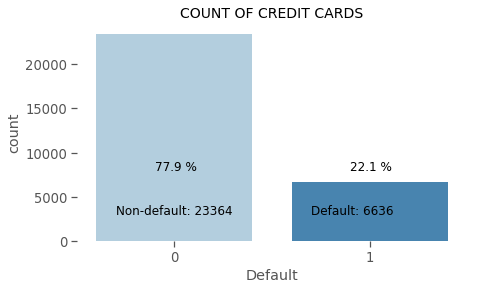

In [10]:
#check biasness of response variable
# The frequency of defaults
yes = dataset.Default.sum()
no = len(dataset)-yes

# Percentage
yes_perc = round(yes/len(dataset)*100, 1)
no_perc = round(no/len(dataset)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('Default',data=dataset, palette="Blues")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
#Removing the frame
plt.box(False);

#A number of 6,636 out of 30,000 (or 22%) of clients will default next month. 
#The data has not a large unbalance with respect of the target value (default.payment.next.month).

Accuracy: 0.808

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

   micro avg       0.81      0.81      0.81      6000
   macro avg       0.75      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000


Average 5-Fold CV Score: 0.8098 , Standard deviation: 0.0045


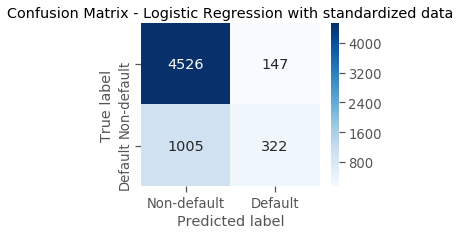

In [11]:
#splite into train (80%) and test (20%).
X_train,X_test,y_train,y_test= train_test_split(stdX,y, test_size=0.2, stratify=y, random_state=42)
#logist regression
LR= LogisticRegression(C=3.73, random_state=0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(LR, stdX, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LR.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression with standardized data");

Accuracy: 0.8153333333333334

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.64      0.37      0.47      1327

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000


Average 5-Fold CV Score: 0.8139 , Standard deviation: 0.0067


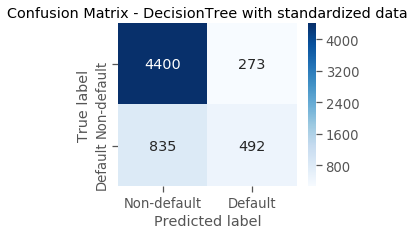

In [12]:
#decision tree
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
                                     max_features= 5, min_samples_leaf= 2, 
                                     random_state=0)
Tree.fit(X_train, y_train)
y_pred = Tree.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Tree, stdX, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Tree.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - DecisionTree with standardized data");

Accuracy: 0.8178333333333333

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.35      0.46      1327

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000


Average 5-Fold CV Score: 0.819 , Standard deviation: 0.0098


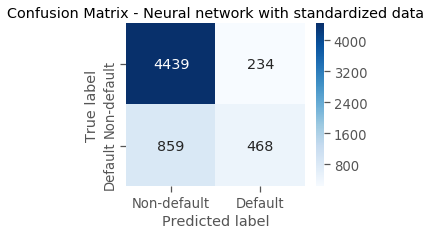

In [13]:
#neural network
from sklearn.neural_network import MLPClassifier
NN= MLPClassifier(solver='adam',hidden_layer_sizes=(10),activation='logistic', max_iter=1000)
NN.fit(X_train, y_train)
y_pred= NN.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(NN, stdX, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,NN.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Neural network with standardized data");

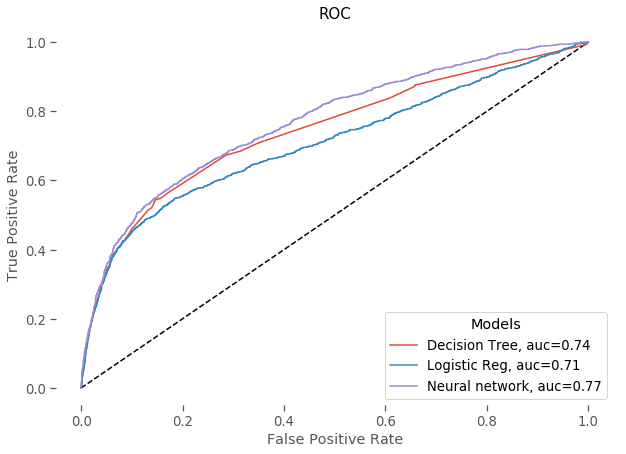

In [15]:
#compare models
#roc
y_pred_proba_Tree = Tree.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_proba_Tree)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_Tree)

y_pred_proba_LR = LR.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_LR)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_LR)

y_pred_proba_NN = NN.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_NN)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_NN)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Decision Tree, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Logistic Reg, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="Neural network, auc="+str(round(auc3,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)

In [16]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# Append different models
models = []
# Logistic Regression
models.append(('LogReg',LogisticRegression(C=3.73, random_state=0)))
# Decision Tree
models.append(('Decision Tree', DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, min_samples_leaf= 8, random_state=0)))
# Neural network
models.append(('Neural network', MLPClassifier(solver='adam',hidden_layer_sizes=(10),activation='logistic', max_iter=1000)))

# Evaluate each model
results = []
f1=[]
precision=[]
recall=[]
names = []
scoring = 'accuracy'

for name, model in models:
    cv_results = cross_val_score(model, stdX, y, cv=5, scoring=scoring)
    results.append(cv_results)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    f1.append(f1_score(y_test, y_pred,average='weighted'))
    precision.append(precision_score(y_test, y_pred,average='weighted'))
    recall.append(recall_score(y_test, y_pred,average='weighted'))
    names.append(name)

    

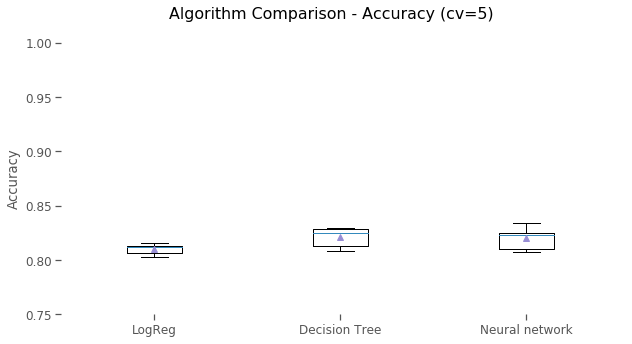

In [17]:
from matplotlib import pyplot
# Plot all the accuracy results vs. each model 
#(model type on the x-axis and accuracy on the y-axis).
fig = pyplot.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.1)
fig.suptitle('Algorithm Comparison - Accuracy (cv=5)')
ax = fig.add_subplot(111)
pyplot.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy')
ax.set_ylim([0.75,1])
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

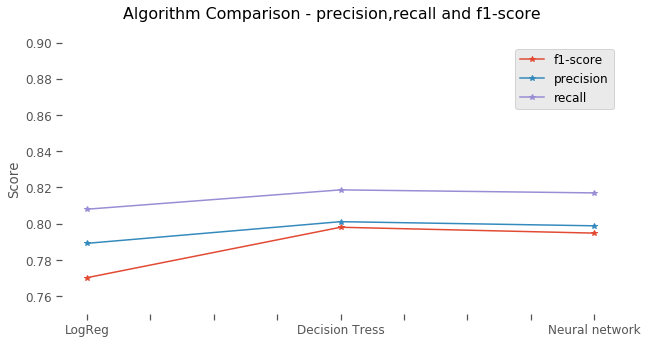

In [18]:
fig = pyplot.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.1)
fig.suptitle('Algorithm Comparison - precision,recall and f1-score')
ax = fig.add_subplot(111)
pyplot.plot(f1,'*-',label="f1-score")
pyplot.plot(precision,'*-',label="precision")
pyplot.plot(recall,'*-',label="recall")
ax.set_xticklabels(['','LogReg','','','','Decision Tress','','','','Neural network'])
ax.set_ylabel('Score')
ax.set_ylim([0.75,0.9])
ax.legend()
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);